<a href="https://colab.research.google.com/github/fatimaiqbal27/Deconvolution/blob/main/deconvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

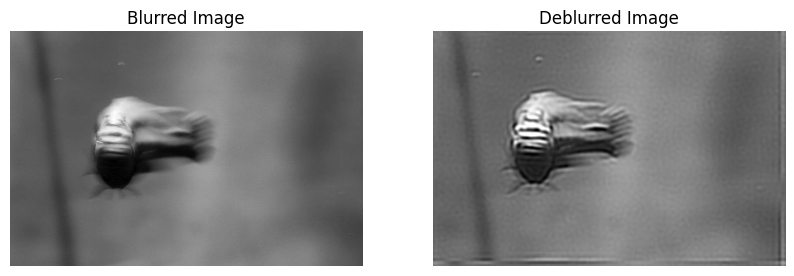

In [ ]:
import cv2
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

def wiener_deconvolution(blurred, kernel, K=0.01):
    """
    Apply Wiener deconvolution to deblur an image.
    :param blurred: Blurred input image (grayscale or single channel)
    :param kernel: Point Spread Function (PSF), should be of same size as the blurred image
    :param K: Regularization constant to avoid division by zero
    :return: Deblurred image
    """
    # Convert kernel to frequency domain
    kernel /= np.sum(kernel)
    blurred_fft = np.fft.fft2(blurred)
    kernel_fft = np.fft.fft2(kernel, s=blurred.shape)

    # Wiener Deconvolution
    deconvolved_fft = np.conj(kernel_fft) * blurred_fft / (np.abs(kernel_fft) ** 2 + K)
    deconvolved = np.fft.ifft2(deconvolved_fft).real

    return np.clip(deconvolved, 0, 255).astype(np.uint8)

# Load a blurred image
image = cv2.imread('/content/blurry-fish.jpg', cv2.IMREAD_GRAYSCALE)

# Define a simple blur kernel (Gaussian-like)
kernel_size = 15
kernel = np.outer(cv2.getGaussianKernel(kernel_size, 3), cv2.getGaussianKernel(kernel_size, 3))

deblurred_image = wiener_deconvolution(image, kernel)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Blurred Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Deblurred Image")
plt.imshow(deblurred_image, cmap='gray')
plt.axis('off')
plt.show()


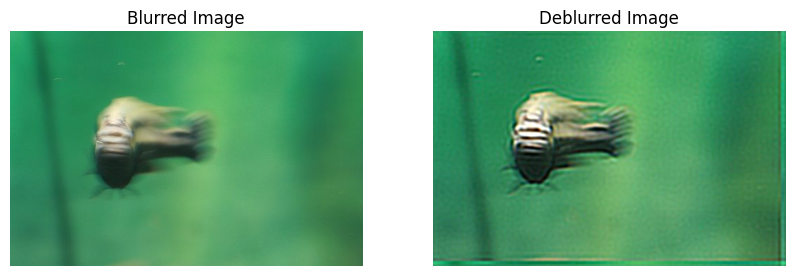

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def wiener_deconvolution(blurred, kernel, K=0.01):
    """
    Apply Wiener deconvolution to deblur an image.
    :param blurred: Blurred input image (single channel)
    :param kernel: Point Spread Function (PSF), should be of same size as the blurred image
    :param K: Regularization constant to avoid division by zero
    :return: Deblurred image (single channel)
    """
    kernel /= np.sum(kernel)
    blurred_fft = np.fft.fft2(blurred)
    kernel_fft = np.fft.fft2(kernel, s=blurred.shape)

    deconvolved_fft = np.conj(kernel_fft) * blurred_fft / (np.abs(kernel_fft) ** 2 + K)
    deconvolved = np.fft.ifft2(deconvolved_fft).real

    return np.clip(deconvolved, 0, 255).astype(np.uint8)

# Load a blurred image (colored)
image = cv2.imread('/content/blurry-fish.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Define a blur kernel (Gaussian-like)
kernel_size = 15
kernel = np.outer(cv2.getGaussianKernel(kernel_size, 3), cv2.getGaussianKernel(kernel_size, 3))

# Apply Wiener deconvolution to each channel
channels = cv2.split(image)
deblurred_channels = [wiener_deconvolution(ch, kernel) for ch in channels]

# Merge channels back into a color image
deblurred_image = cv2.merge(deblurred_channels)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Blurred Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Deblurred Image")
plt.imshow(deblurred_image)
plt.axis('off')
plt.show()


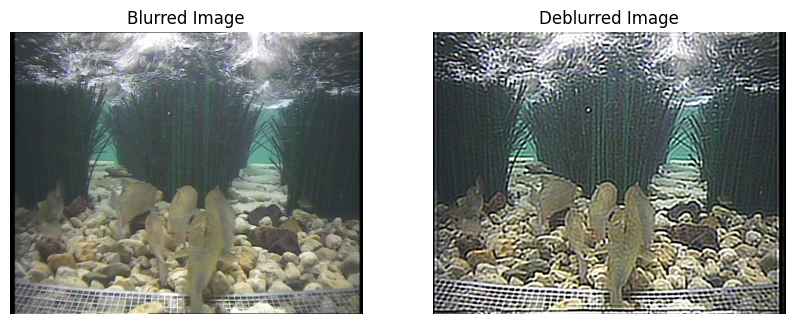

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def wiener_deconvolution(blurred, kernel, K=0.01):
    """
    Apply Wiener deconvolution to deblur an image.
    :param blurred: Blurred input image (single channel)
    :param kernel: Point Spread Function (PSF), should be of same size as the blurred image
    :param K: Regularization constant to avoid division by zero
    :return: Deblurred image (single channel)
    """
    kernel /= np.sum(kernel)
    blurred_fft = np.fft.fft2(blurred)
    kernel_fft = np.fft.fft2(kernel, s=blurred.shape)

    deconvolved_fft = np.conj(kernel_fft) * blurred_fft / (np.abs(kernel_fft) ** 2 + K)
    deconvolved = np.fft.ifft2(deconvolved_fft).real

    return np.clip(deconvolved, 0, 255).astype(np.uint8)

# Load a blurred image (colored)
image = cv2.imread('/content/0018.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Define a blur kernel (Gaussian-like)
kernel_size = 15
kernel = np.outer(cv2.getGaussianKernel(kernel_size, 3), cv2.getGaussianKernel(kernel_size, 3))

# Apply Wiener deconvolution to each channel
channels = cv2.split(image)
deblurred_channels = [wiener_deconvolution(ch, kernel) for ch in channels]

# Merge channels back into a color image
deblurred_image = cv2.merge(deblurred_channels)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Blurred Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Deblurred Image")
plt.imshow(deblurred_image)
plt.axis('off')
plt.show()
